In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
file_path = 'augmented_emg_dataset.csv'
data = pd.read_csv(file_path)


In [3]:
# Drop target column for feature scaling and correlation
features = data.drop(columns=['Target'])

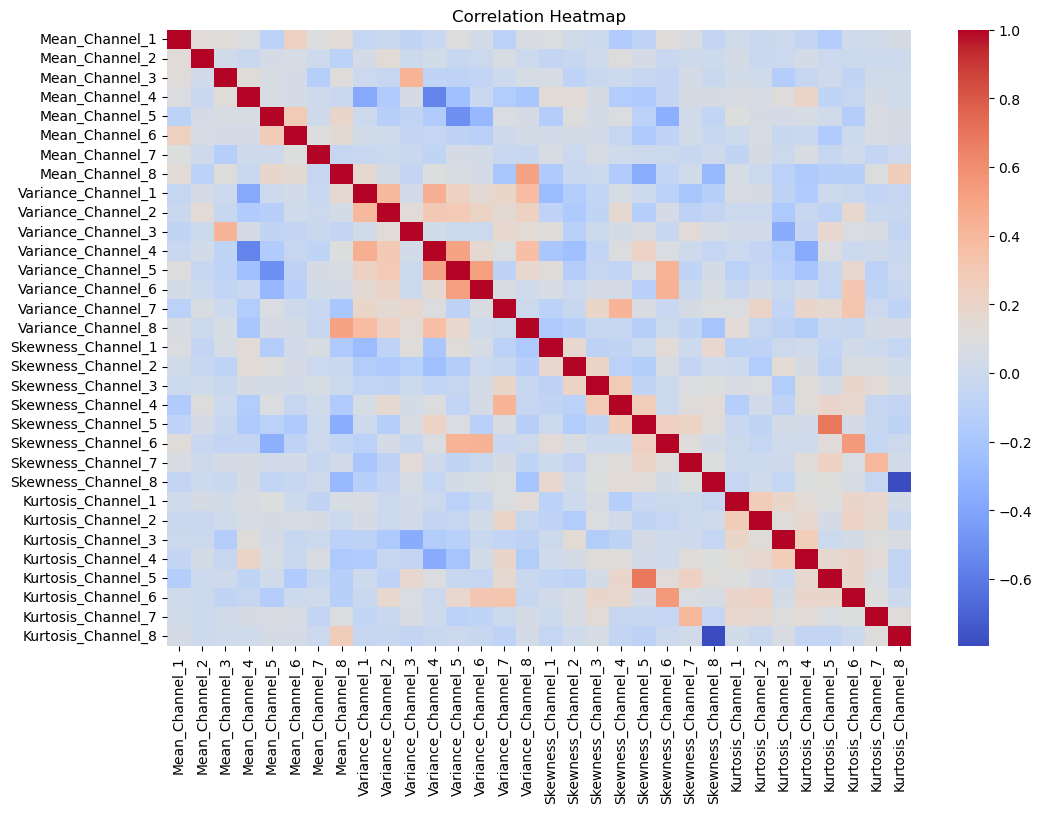

   Mean_Channel_1  Mean_Channel_2  Mean_Channel_3  Mean_Channel_4  \
0        1.296318        0.061386        0.726201       -4.037617   
1        0.810197       -0.083401       -0.182143       -0.995862   
2        1.491352       -1.956265       -0.324061        1.880928   
3        0.946876       -0.147391        0.160972       -0.890193   
4        0.495414        0.556557        0.617647        0.246499   

   Mean_Channel_5  Mean_Channel_6  Mean_Channel_7  Mean_Channel_8  \
0       -0.668591       -0.942134        0.377803        1.551918   
1        0.134542        0.288146        0.290347        1.567992   
2        1.124683        0.578044        0.874131        1.552547   
3        0.289742        1.107351        0.903582        1.554221   
4        0.362933        0.243611        0.191484        1.554112   

   Variance_Channel_1  Variance_Channel_2  ...  Skewness_Channel_7  \
0            5.125753            2.038820  ...           -0.200544   
1           -0.104699         

In [4]:
plt.figure(figsize=(12, 8))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature scaling using StandardScaler
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Check the first few rows of the scaled features
print(scaled_features.head())

Correlation Analysis

In [5]:

# Drop the 'Target' column for correlation analysis
features = data.drop(columns=['Target'])

# Compute the correlation matrix
corr_matrix = features.corr()

# Optionally: Identify pairs of highly correlated features
high_corr_threshold = 0.9
high_corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Remove self-correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs > high_corr_threshold]
print("Highly correlated feature pairs (correlation > 0.9):")
print(high_corr_pairs)

Highly correlated feature pairs (correlation > 0.9):
Series([], dtype: float64)


Normalization (Min-Max Scaling):

In [6]:

# Drop the 'Target' column and perform scaling on the features
features = data.drop(columns=['Target'])

# Apply Min-Max Normalization (Scaling each feature to [0, 1])
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add the 'Target' column back to the normalized dataset
normalized_data = pd.concat([normalized_features, data['Target']], axis=1)

In [7]:
normalized_data.head(10)

Mean_Channel_1  Mean_Channel_2  Mean_Channel_3  Mean_Channel_4  \
0        0.727356        0.488275        0.528765        0.083162   
1        0.672506        0.472863        0.439654        0.430756   
2        0.749362        0.273503        0.425731        0.759499   
3        0.687928        0.466051        0.473314        0.442831   
4        0.636989        0.540984        0.518116        0.572726   
5        0.859239        0.430099        0.497345        0.267005   
6        0.569087        0.485186        0.935899        0.578662   
7        0.640440        0.556731        0.492958        0.502555   
8        0.558734        0.489816        0.479743        0.588510   
9        0.610991        0.451497        0.488690        0.552799   

   Mean_Channel_5  Mean_Channel_6  Mean_Channel_7  Mean_Channel_8  \
0        0.579781        0.444447        0.546437        0.932865   
1        0.661138        0.576545        0.537354        0.939166   
2        0.761439        0.607672        0.597985        0.933112   
3        0.676860        0.664505        0.601044        0.933768   
4        0.684274        0.571763        0.527086        0.933725   
5        0.621143        0.526696        0.696005        0.935996   
6        0.679405        0.509499        0.384750        0.932706   
7        0.617709        0.629344        0.523178        0.933063   
8        0.681187        0.530445        0.558734        0.933455   
9        0.700777        0.603477        0.524345        0.933815   

   Variance_Channel_1  Variance_Channel_2  ...  Skewness_Channel_8  \
0            0.854899            0.473877  ...            0.810884   
1            0.095417            0.038640  ...            0.851822   
2            0.474614            0.610845  ...            0.875442   
3            0.161936            0.242260  ...            0.817246   
4            0.029839            0.120565  ...            0.611519   
5            0.587524            0.454397  ...            0.814282   
6            0.049997            0.076131  ...            0.928490   
7            0.064029            0.134194  ...            0.898913   
8            0.112174            0.246191  ...            0.863039   
9            0.042668            0.167979  ...            0.868081   

   Kurtosis_Channel_1  Kurtosis_Channel_2  Kurtosis_Channel_3  \
0            0.122016            0.112158            0.079441   
1            0.283254            0.108281            0.389930   
2            0.173659            0.121611            0.243407   
3            0.112004            0.131723            0.148600   
4            0.176056            0.266273            0.228168   
5            0.113578            0.092650            0.108433   
6            0.096803            0.132532            0.050637   
7            0.132716            0.089525            0.094849   
8            0.139423            0.120758            0.219689   
9            0.340954            0.223329            0.151749   

   Kurtosis_Channel_4  Kurtosis_Channel_5  Kurtosis_Channel_6  \
0            0.049961            0.225002            0.126667   
1            0.117139            0.204158            0.090718   
2            0.160728            0.330006            0.132005   
3            0.149175            0.226891            0.077694   
4            0.278866            0.095563            0.042792   
5            0.051669            0.193388            0.079101   
6            0.141730            0.328217            0.083014   
7            0.143272            0.350673            0.110008   
8            0.135392            0.321931            0.070059   
9            0.176355            0.053386            0.031074   

   Kurtosis_Channel_7  Kurtosis_Channel_8  Target  
0            0.064274            0.011462       1  
1            0.134274            0.012450       3  
2            0.087139            0.013632       4  
3            0.093740            0.023370       5  
4            0.19720

In [8]:
# Save the normalized dataset (if needed)
normalized_data.to_csv('normalized_emg_dataset.csv', index=False)


In [9]:
# Load the dataset
file_path = 'normalized_emg_dataset.csv'
data = pd.read_csv(file_path)

# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values in each column (if any)
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values
if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print("Columns with missing values and their counts:")
    print(missing_values)

No missing values found in the dataset.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [10]:

# Load the dataset
file_path = 'normalized_emg_dataset.csv'
data = pd.read_csv(file_path)

# Split the features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Split the dataset into training and testing (15% for testing), with stratification to ensure balanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Combine the test data back with the target column
test_data = pd.concat([X_test, y_test], axis=1)

# Combine the training data back with the target column (remaining 85%)
train_data = pd.concat([X_train, y_train], axis=1)

# Save the test data to a CSV file
test_data.to_csv('test.csv', index=False)

# Save the remaining training data (85%) back to the original CSV file
train_data.to_csv('normalized_emg_dataset.csv', index=False)

print("Test data has been saved to 'test.csv', and remaining data saved to 'normalized_emg_dataset.csv'.")


Test data has been saved to 'test.csv', and remaining data saved to 'normalized_emg_dataset.csv'.


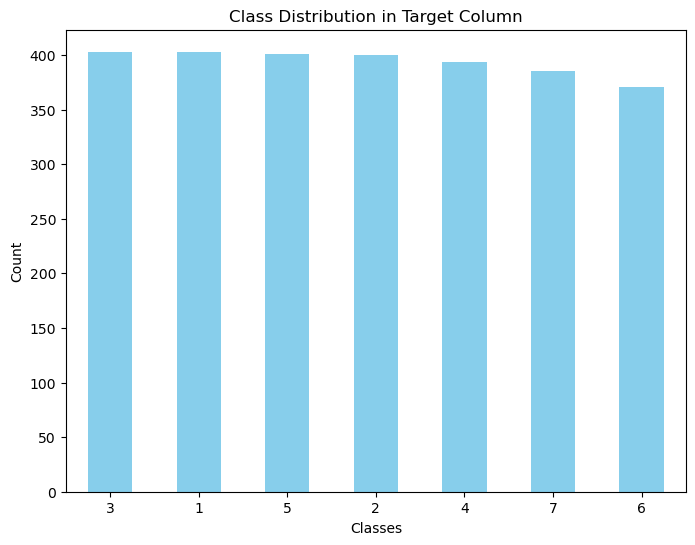

In [13]:

# Plot class distribution in the 'Target' column
class_counts = data['Target'].value_counts()

# Create the plot
plt.figure(figsize=(8,6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Target Column')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [14]:
# Display the number of rows and columns in the dataset
print(f"Dataset size: {data.shape[0]} rows, {data.shape[1]} columns")


Dataset size: 2757 rows, 33 columns
